# Alex Belianinov
# Center for Nanophase Materials Sciences, 
# Oak Ridge National Laboratory 

### Filtering Example

In [1]:
import cv2 #image processing lib
import numpy as np #fast math
from matplotlib import pyplot as plt #plotting
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 10] #figure size

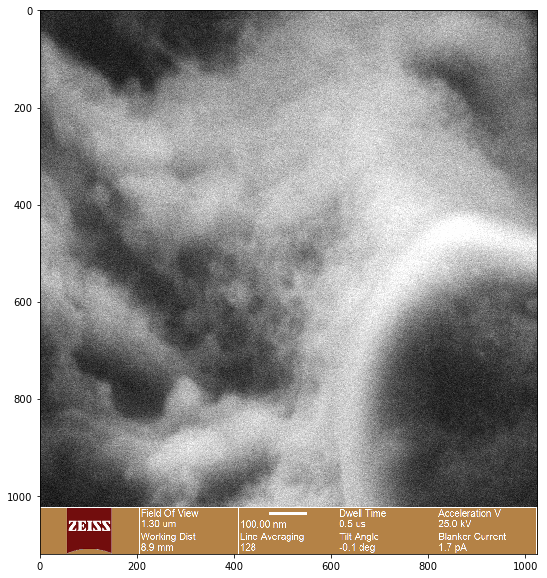

In [2]:
img = cv2.imread('PQ-24_raw.tif') #load in image

#img = cv2.imread('BNT_BT_10_90_0001 ampl_10um.tif') #load in image
#img = cv2.imread('cracked_800_800_01.tif') #load in image

plt.imshow(img) #show image data

(1013, 1024, 3)


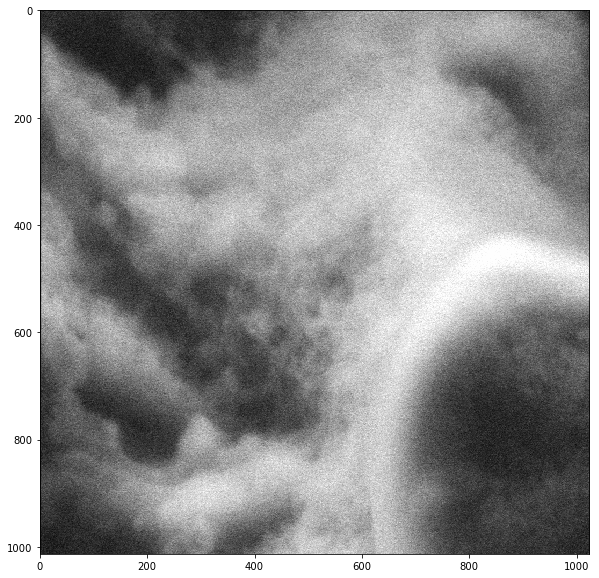

In [3]:
img_crop = img[:-107, :] #crop the bar at the bottom
plt.imshow(img_crop) #show the cropped image
print(np.shape(img_crop)) #print the shape of the image matrix

In [4]:
img_gray = cv2.cvtColor(img_crop, cv2.COLOR_RGB2GRAY) #flatten image matrix to 2D
print(np.shape(img_gray)) #check shape

(1013, 1024)


### Convolution

* As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. LPF helps in removing noises, blurring the images etc. HPF filters helps in finding edges in the images.

* We will try a 5x5 averaging filter kernel on an image.

In [5]:
kernel = np.ones((5,5),np.float32)/25
filtered_img = cv2.filter2D(img_crop,-1,kernel)

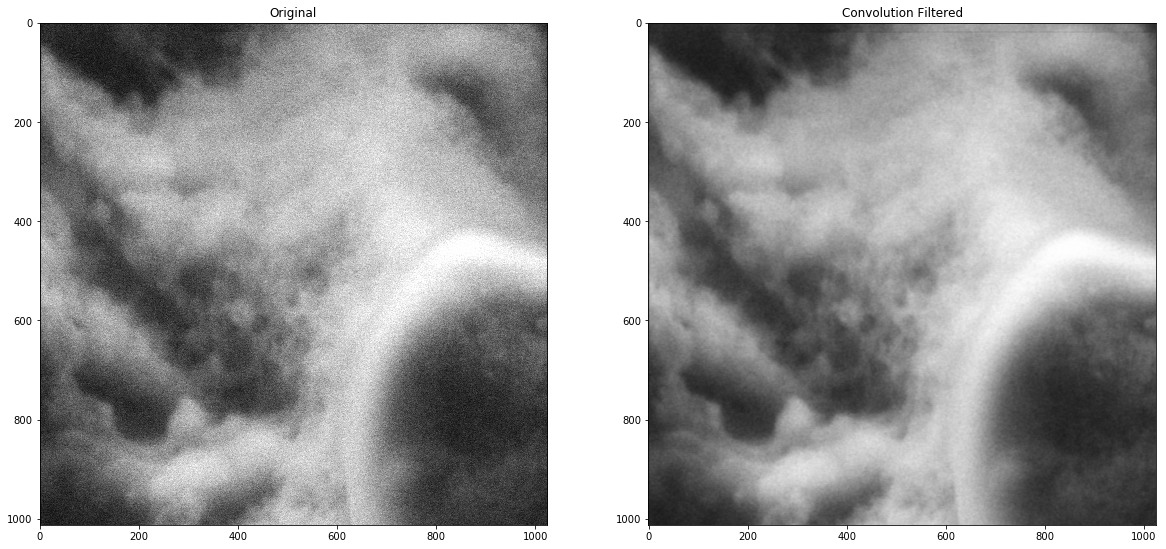

In [6]:
plt.subplot(1,2,1)
plt.imshow(img_crop)
plt.title("Original")
plt.subplot(1,2,2) 
plt.imshow(filtered_img)
plt.title("Convolution Filtered")

### Mean Filtering

* Done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element. 

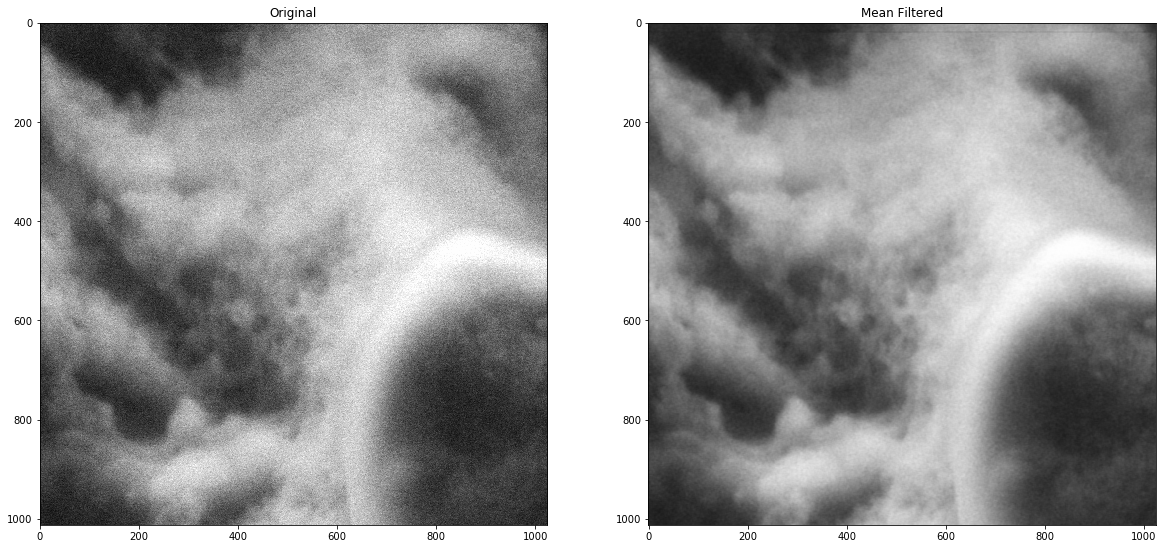

In [7]:
mean_img = cv2.blur(img_crop,(5,5))
    
plt.subplot(1,2,1)
plt.imshow(img_crop)
plt.title("Original")
plt.subplot(1,2,2) 
plt.imshow(mean_img)
plt.title("Mean Filtered")

### Median Filtering

* Takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images.

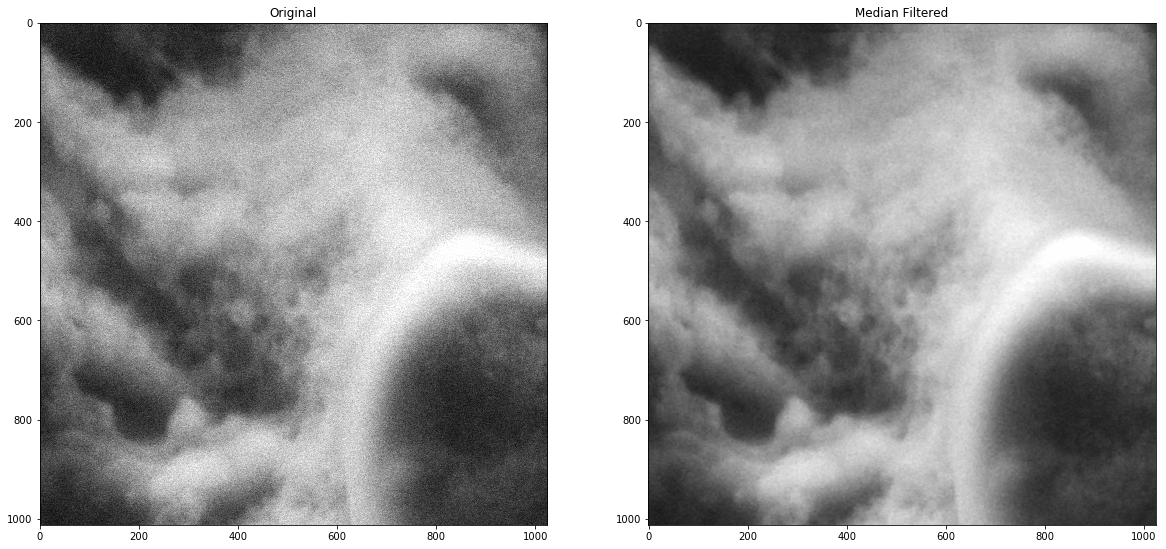

In [8]:
median_img = cv2.medianBlur(img_crop,5)

plt.subplot(1,2,1)
plt.imshow(img_crop)
plt.title("Original")
plt.subplot(1,2,2) 
plt.imshow(median_img)
plt.title("Median Filtered")

### Gaussian Blurring

* Instead of box filter, gaussian kernel is used. Gaussian blurring is highly effective in removing gaussian noise from the image.

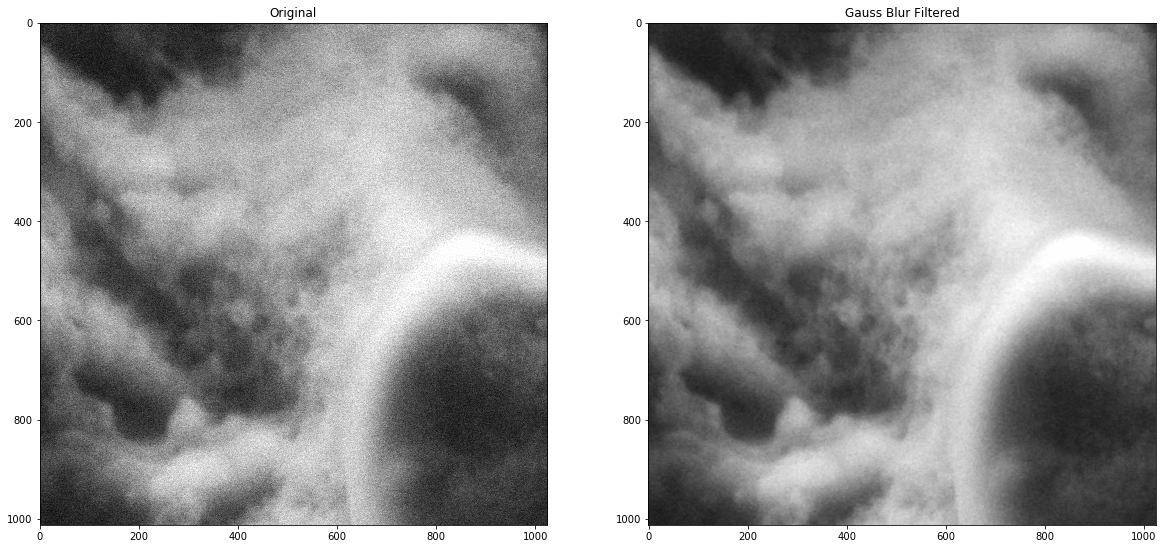

In [9]:
gauss_blur_img = cv2.GaussianBlur(img_crop,(5,5),0)

plt.subplot(1,2,1)
plt.imshow(img_crop)
plt.title("Original")
plt.subplot(1,2,2) 
plt.imshow(median_img)
plt.title("Gauss Blur Filtered")

### Bilateral Filtering

* Bilateral filter takes a gaussian filter in space, but adds one more gaussian filter which is a function of pixel difference. Gaussian function of space makes sure only nearby pixels are considered for blurring, while gaussian function of intensity difference makes sure only those pixels with similar intensity to central pixel is considered for blurring. This preserves the edges since pixels at edges will have large intensity variation.

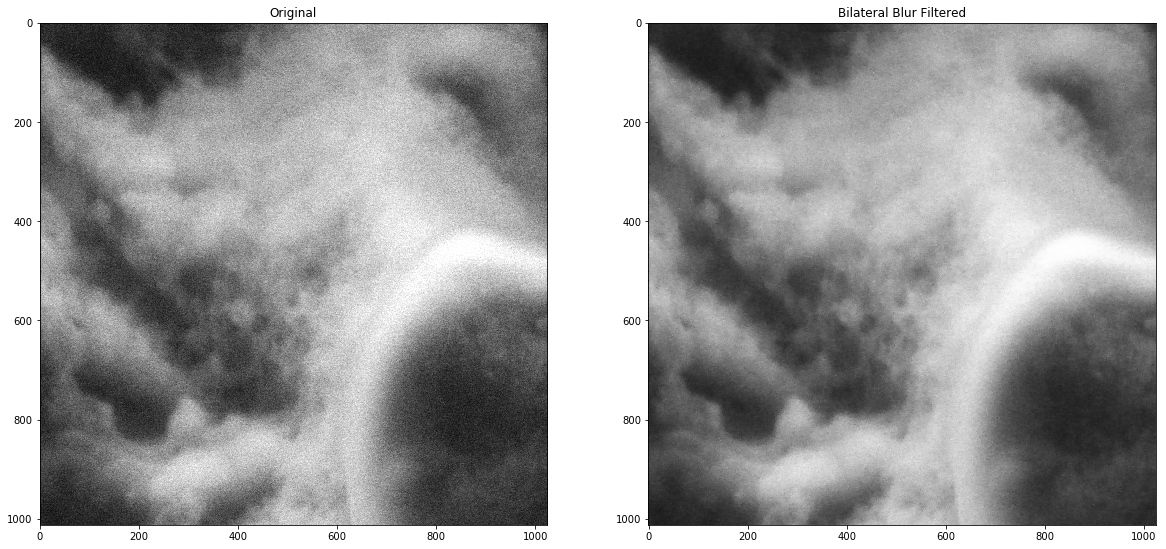

In [10]:
bilateral_img = cv2.bilateralFilter(img_crop,9,50,50)

plt.subplot(1,2,1)
plt.imshow(img_crop)
plt.title("Original")
plt.subplot(1,2,2) 
plt.imshow(bilateral_img)
plt.title("Bilateral Blur Filtered")

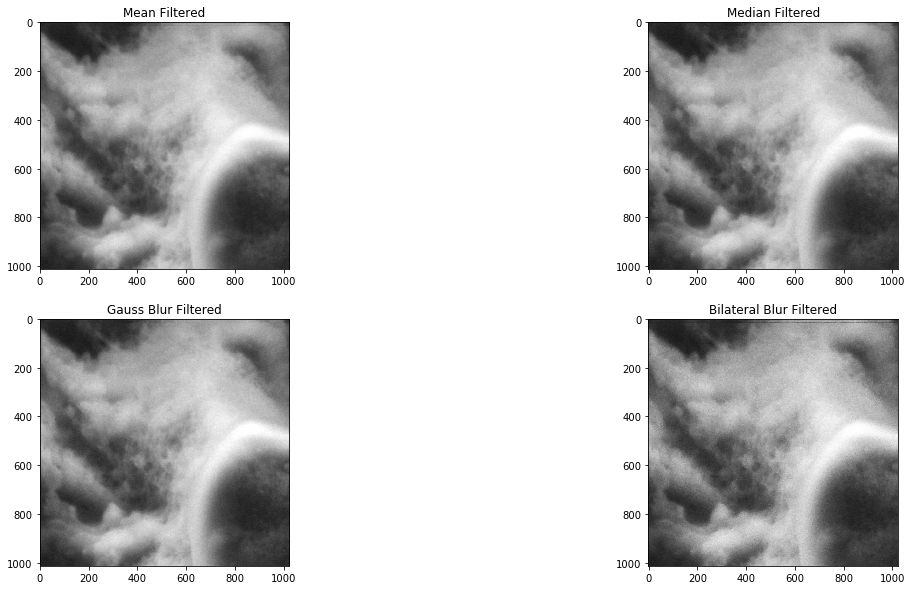

In [11]:
plt.subplot(2,2,1)
plt.imshow(mean_img)
plt.title("Mean Filtered")

plt.subplot(2,2,2)
plt.imshow(median_img)
plt.title("Median Filtered")


plt.subplot(2,2,3)
plt.imshow(median_img)
plt.title("Gauss Blur Filtered")


plt.subplot(2,2,4)
plt.imshow(bilateral_img)
plt.title("Bilateral Blur Filtered")